In [8]:
# Importing necessary libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [94]:
# Load the dataset

penguins = sb.load_dataset('penguins')

# Preview it 


print("First 30 rows of the dataset:")
print(penguins.head(30))


First 30 rows of the dataset:
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0   Adelie  Torgersen            39.1           18.7              181.0   
1   Adelie  Torgersen            39.5           17.4              186.0   
2   Adelie  Torgersen            40.3           18.0              195.0   
3   Adelie  Torgersen             NaN            NaN                NaN   
4   Adelie  Torgersen            36.7           19.3              193.0   
5   Adelie  Torgersen            39.3           20.6              190.0   
6   Adelie  Torgersen            38.9           17.8              181.0   
7   Adelie  Torgersen            39.2           19.6              195.0   
8   Adelie  Torgersen            34.1           18.1              193.0   
9   Adelie  Torgersen            42.0           20.2              190.0   
10  Adelie  Torgersen            37.8           17.1              186.0   
11  Adelie  Torgersen            37.8           17.3              180.

In [88]:
# Summary statistics of the dataset
print("\nSummary statistics:")
print(penguins.describe())



Summary statistics:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


Text(0.5, 1.0, 'Distribution of Bill Depth (mm)')

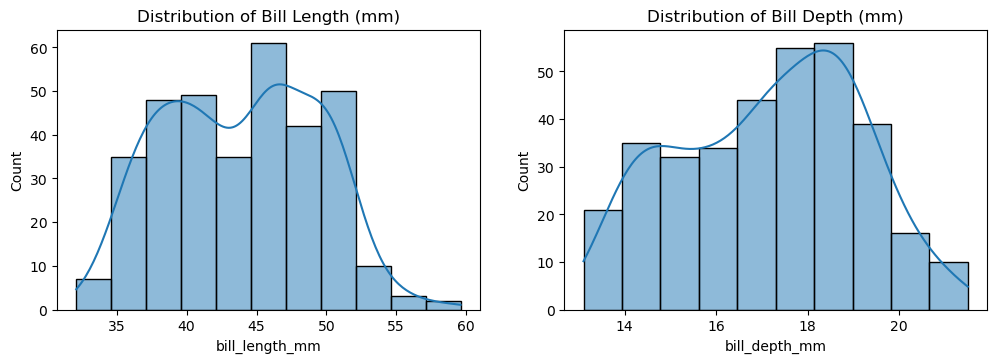

In [92]:
# Numerical features: Bill length and depth
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sb.histplot(penguins['bill_length_mm'], kde=True)
plt.title('Distribution of Bill Length (mm)')

plt.subplot(2, 2, 2)
sb.histplot(penguins['bill_depth_mm'], kde=True)
plt.title('Distribution of Bill Depth (mm)')

In [5]:
# Data Preprocessing (drop NA's)

penguins.dropna(inplace=True)

In [7]:
# Selecting target / features

X = penguins[['bill_length_mm', 'bill_depth_mm']]  # Features
y = penguins['species']  # Target

In [9]:
# Finding the best value for 'k' in KNN and best accuracy given that k.

best_k = 1
best_score = 0

In [13]:
# Splitting the data into training and testing sets (standard 80-20 train-test split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Trying k values from 1 to 20 to find the one that performs the best

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Training
    score = knn.score(X_test, y_test)  # Testing

    # If the current score is better than the best score so far, update it
    if score > best_score:
        best_k = k
        best_score = score
# print to console results
print(f"The best value for k is: {best_k} with an accuracy of {best_score:.2f}")

The best value for k is: 12 with an accuracy of 0.99


In [17]:
# Creating a new KNN classifier with the best k value

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [70]:
# Creating a mesh grid for the decision boundary
# Credit https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib

x_min, x_max = X['bill_length_mm'].min() - 1, X['bill_length_mm'].max() + 1
y_min, y_max = X['bill_depth_mm'].min() - 1, X['bill_depth_mm'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))


In [72]:
# Convert the mesh grid to a DataFrame with feature names matching the training data

grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['bill_length_mm', 'bill_depth_mm'])

In [74]:
# Predicting the species for each point in the mesh grid
# Credit to same link in cell 19 above.

Z = knn_best.predict(grid_points)

# Convert categorical predictions (species) into numeric codes
Z = pd.Categorical(Z).codes  # Convert categories to numeric codes


Z = Z.reshape(xx.shape)

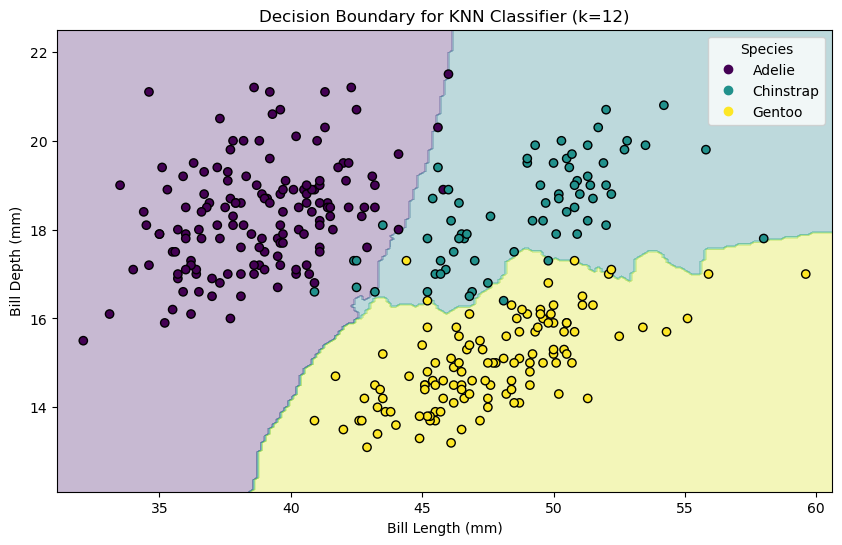

In [80]:
# Step 6: Plotting the decision boundary and the actual data points

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)  # Plotting the decision boundary
scatter = plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=pd.Categorical(y).codes, edgecolor='k')  # Plotting actual data points

# Adding a legend for species categories

handles, _ = scatter.legend_elements()
plt.legend(handles, penguins['species'].unique(), title="Species")

plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title(f'Decision Boundary for KNN Classifier (k={best_k})')
plt.show()

In [64]:
# 2             Load data set
tips = sb.load_dataset('tips')

In [66]:
# Calculate tip as a percent of the total bill
tips['tip_percent'] = (tips['tip'] / tips['total_bill']) * 100

In [68]:
# Separate the features and the target variable
X = tips[['total_bill', 'size']]
y = tips['tip_percent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Trying polynomial degrees from 1 (linear) up to 5 and finding the most accurate model
best_degree = 1
best_model = None
best_score = -np.inf
best_mse = None
best_coefficients = None

for degree in range(1, 6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Evaluate the model
    y_pred = model.predict(X_poly_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # If this model is the best so far, update the best model details
    if r2 > best_score:
        best_degree = degree
        best_model = model
        best_score = r2
        best_mse = mse
        best_coefficients = model.coef_

# The best degree and the underlying function's coefficients
best_degree, best_coefficients

(1, array([ 0.        , -0.28453077,  0.91607656]))

In [72]:
# Retrieve the intercept from the best model
best_intercept = best_model.intercept_

best_intercept

19.533553115881602

In [176]:
# Coefficient for total_bill: approximately -0.285
# Coefficient for size: approximately 0.916
# y intercept means the baseline tip percentage, hypothetically in this case, when size of party is 0 and total bill is 0, 
# the baseline tip is around 20% (19.53). which makes since. I usually tip around 20% as well.

In [80]:
# 3          Load Data set


hw1data = pd.read_csv('hw1data.csv')

# Inspect the first few rows of the dataset
hw1data.head(10)



,1,2.43294197
0,2,3.318595
1,3,2.532240
2,4,1.486395
3,5,1.832151
4,6,3.941169
5,7,6.563973
6,8,7.978716
7,9,7.574237
8,10,6.411958
9,11,6.250020


In [84]:
# Rename columns for clarity
hw1data.columns = ['x', 'y']

# Inspect the first 10 rows again
hw1data.head(10)

,x,y
0,2,3.318595
1,3,2.532240
2,4,1.486395
3,5,1.832151
4,6,3.941169
5,7,6.563973
6,8,7.978716
7,9,7.574237
8,10,6.411958
9,11,6.250020


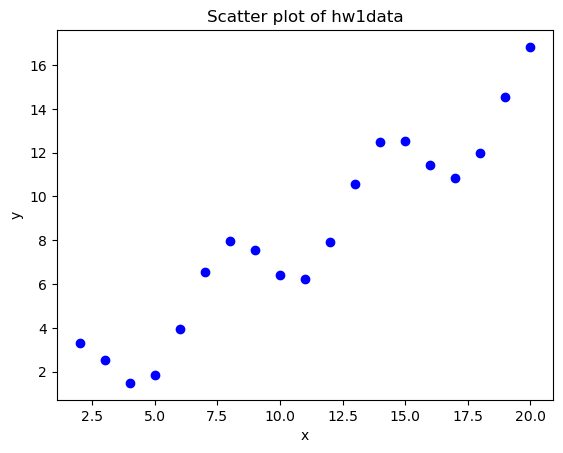

In [86]:
# Plotting the data to visually inspect its pattern
plt.scatter(hw1data['x'], hw1data['y'], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of hw1data')
plt.show()

In [ ]:
# appears to be a polynomial of 7th degree or higher perhaps.

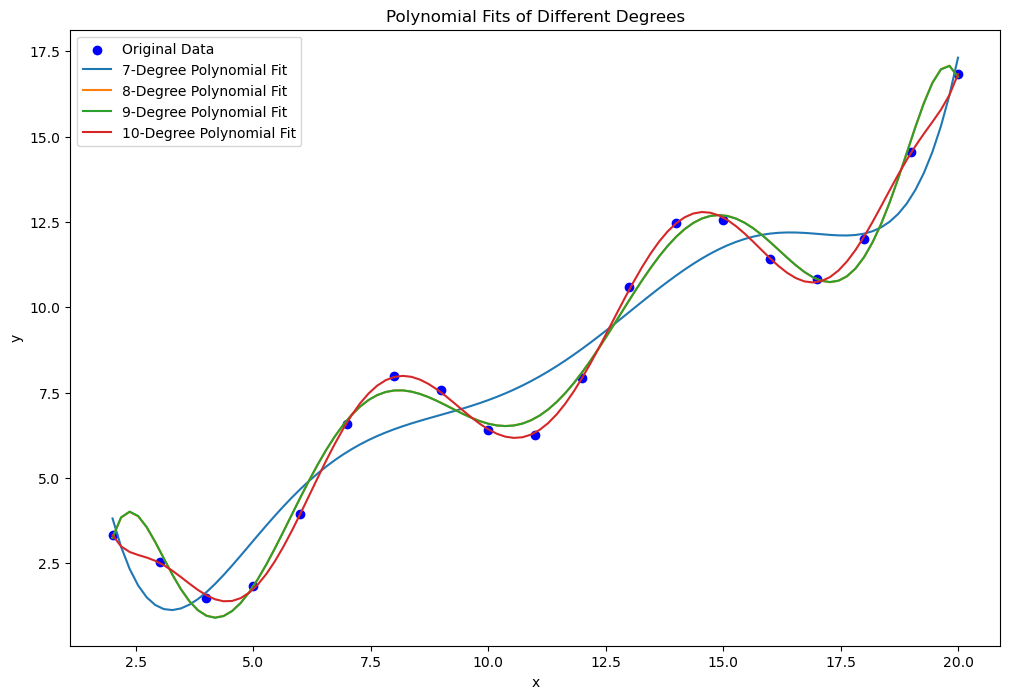

In [110]:
# Fit polynomials of degrees ranging from 7 up to 10 to check if a higher degree might be necessary
degrees_to_test = range(7, 11)
polynomial_fits = {}

for degree in degrees_to_test:
    # Fit the polynomial
    poly_coeffs = np.polyfit(hw1data['x'], hw1data['y'], degree)
    poly_model = np.poly1d(poly_coeffs)
    
    # Generate values for the fitted polynomial
    x_fit = np.linspace(min(hw1data['x']), max(hw1data['x']), 100)
    y_fit = poly_model(x_fit)
    
    # Store the results
    polynomial_fits[degree] = {
        'model': poly_model,
        'x_fit': x_fit,
        'y_fit': y_fit
    }

# Plotting the results for each polynomial degree
plt.figure(figsize=(12, 8))
plt.scatter(hw1data['x'], hw1data['y'], color='blue', label='Original Data')

for degree, fit in polynomial_fits.items():
    plt.plot(fit['x_fit'], fit['y_fit'], label=f'{degree}-Degree Polynomial Fit')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fits of Different Degrees')
plt.legend()
plt.show()
degree += 2

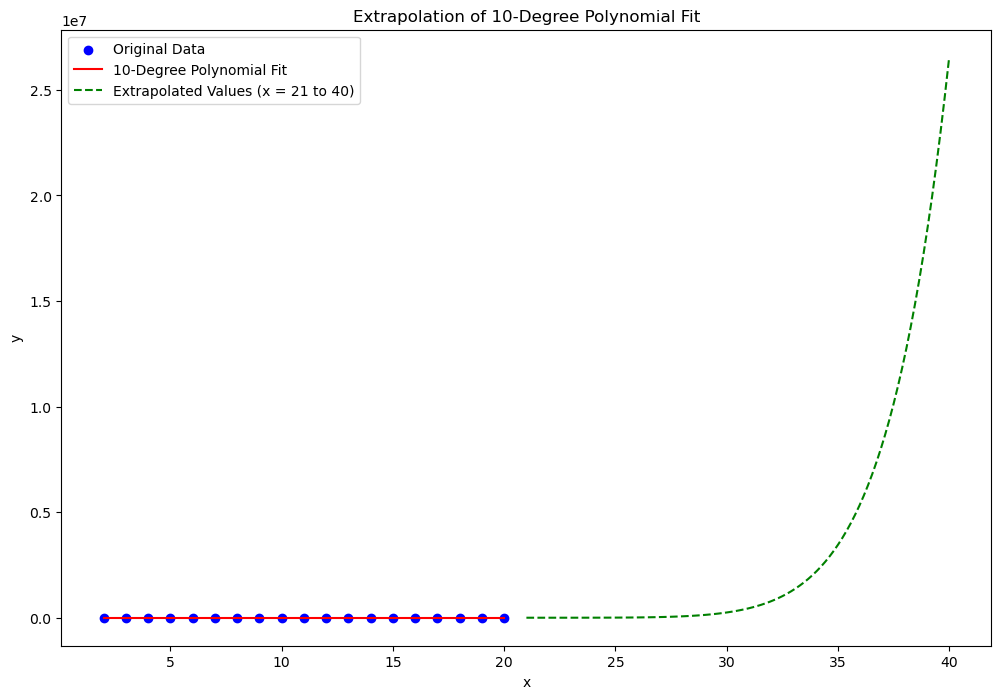

In [112]:
# Generate x values outside the given range (21 to 40) for extrapolation
x_outside_range = np.linspace(21, 40, 100)
x_outside_range_reshaped = x_outside_range.reshape(-1, 1)

# Use the best fitting polynomial (let's use the 10-degree model) for extrapolation
best_degree = 10
best_poly_model = polynomial_fits[best_degree]['model']

# Predict y values for the extrapolated x values
y_outside_pred = best_poly_model(x_outside_range)

# Plotting the original data, the best fit, and the extrapolated values
plt.figure(figsize=(12, 8))
plt.scatter(hw1data['x'], hw1data['y'], color='blue', label='Original Data')
plt.plot(polynomial_fits[best_degree]['x_fit'], polynomial_fits[best_degree]['y_fit'], color='red', label=f'{best_degree}-Degree Polynomial Fit')
plt.plot(x_outside_range, y_outside_pred, color='green', linestyle='--', label='Extrapolated Values (x = 21 to 40)')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Extrapolation of {best_degree}-Degree Polynomial Fit')
plt.legend()
plt.show()


In [ ]:
# thats not reasonable, as it increases greatly after x = 30

In [ ]:
# lets try polynomial of 3

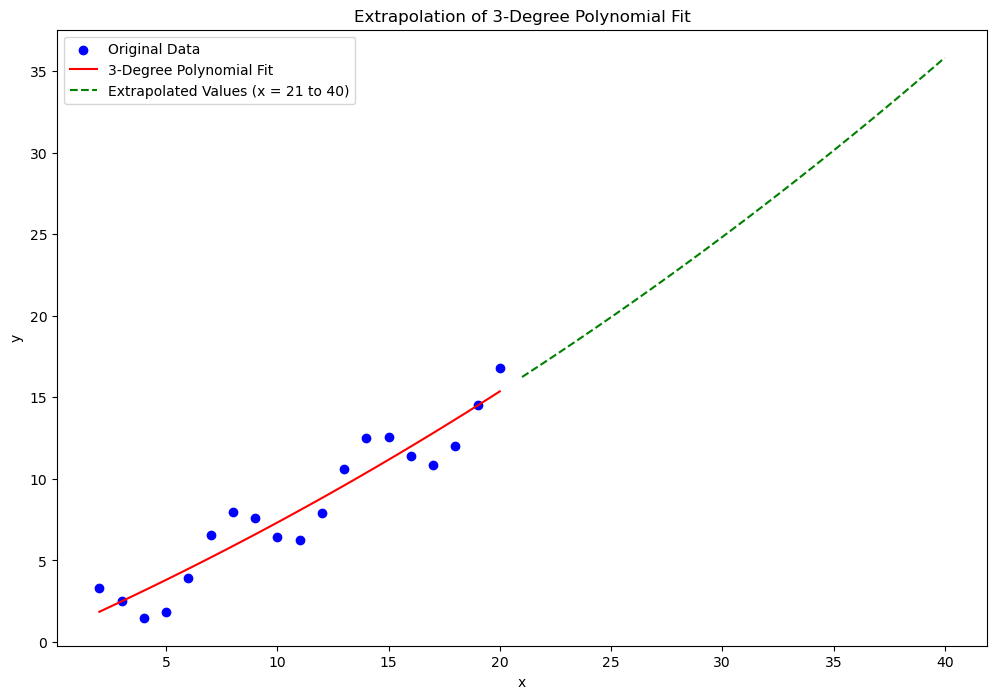

In [106]:
# Generate x values outside the given range (21 to 40) for extrapolation
x_outside_range = np.linspace(21, 40, 100)
x_outside_range_reshaped = x_outside_range.reshape(-1, 1)

# Use the best fitting polynomial (let's use the 10-degree model) for extrapolation
best_degree = 3
best_poly_model = polynomial_fits[best_degree]['model']

# Predict y values for the extrapolated x values
y_outside_pred = best_poly_model(x_outside_range)

# Plotting the original data, the best fit, and the extrapolated values
plt.figure(figsize=(12, 8))
plt.scatter(hw1data['x'], hw1data['y'], color='blue', label='Original Data')
plt.plot(polynomial_fits[best_degree]['x_fit'], polynomial_fits[best_degree]['y_fit'], color='red', label=f'{best_degree}-Degree Polynomial Fit')
plt.plot(x_outside_range, y_outside_pred, color='green', linestyle='--', label='Extrapolated Values (x = 21 to 40)')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Extrapolation of {best_degree}-Degree Polynomial Fit')
plt.legend()
plt.show()

In [ ]:
# this seems to do a better job predicting y values when x is greater than 20.

In [116]:
# 4    

# !pip install ucimlrepo

In [224]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [236]:

from sklearn.linear_model import LogisticRegression

# Prepare X and y
X_income = X[['Income']]  # Use Income as the independent variable
y_diabetes = y  #target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_income, y_diabetes, test_size=0.2, random_state=42)

In [238]:
# Create the logistic regression model
log_reg = LogisticRegression()

# Fit the model using the training set
log_reg.fit(X_train, y_train)

# Print the model's intercept and coefficient
print("Intercept:", log_reg.intercept_[0])
print("Coefficient (w1) for Income:", log_reg.coef_[0][0])

C:\Users\decke\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept: -0.6345068760805029
Coefficient (w1) for Income: -0.20675046122012963


In [240]:
# Predict the probabilities of the test set
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Print accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     43739
           1       0.00      0.00      0.00      6997

    accuracy                           0.86     50736
   macro avg       0.43      0.50      0.46     50736
weighted avg       0.74      0.86      0.80     50736



C:\Users\decke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\decke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\decke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [262]:
# Choose two Income values
Income1 = 5
Income2 = 4

# Calculate log-odds for both Income values
log_odds1 = log_reg.intercept_[0] + log_reg.coef_[0][0] * Income1 
log_odds2 = log_reg.intercept_[0] + log_reg.coef_[0][0] * Income2

# Difference in log-odds
log_odds_diff = log_odds2 - log_odds1
print("Difference in log-odds:", log_odds_diff)

# Extract the coefficient for Income (w1) (use abs to get rid of negative value not equaling positive)
w1 = abs(log_reg.coef_[0][0])
print("w1:", w1)
print("Is the log-odds difference equal to w1?", np.isclose(log_odds_diff, w1))

Difference in log-odds: 0.20675046122012963
w1: 0.20675046122012963
Is the log-odds difference equal to w1? True


In [264]:
# Calculate odds for Income1 and Income2
odds1 = np.exp(log_odds1)
odds2 = np.exp(log_odds2)

# Ratio of odds
odds_ratio = odds2 / odds1
print("Odds ratio:", odds_ratio)

# Confirm that the odds ratio is equal to e^w1
e_w1 = np.exp(w1)
print("e^w1:", e_w1)
print("Is the odds ratio equal to e^w1?", np.isclose(odds_ratio, e_w1))

Odds ratio: 1.2296756817226064
e^w1: 1.2296756817226067
Is the odds ratio equal to e^w1? True


In [ ]:
#5.

<Figure size 640x480 with 0 Axes>

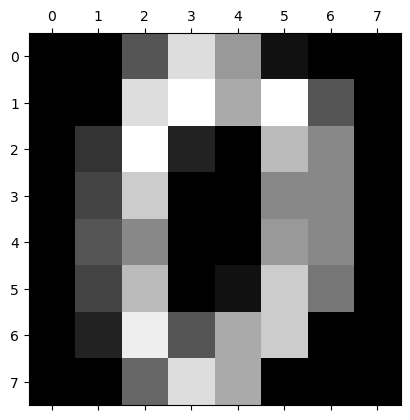

Model Accuracy: 0.97


In [216]:
# Load the digits dataset

from sklearn.datasets import load_digits
digits = load_digits()

# Visualize an example image
plt.gray()  # Set color map to grayscale
plt.matshow(digits.images[0])  # Display the first image in the dataset
plt.show()

# Split the dataset into features (X) and target labels (y)
X = digits.data  # Flattened image data
y = digits.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Evaluate the model's accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

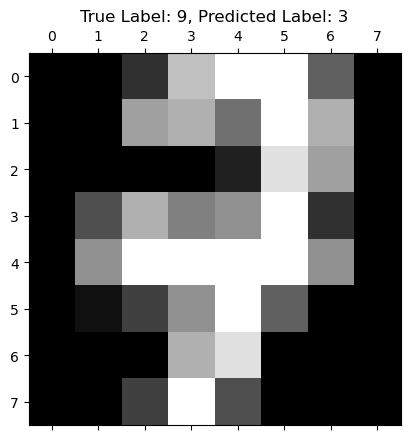

Predicted Probabilities: [[3.64160501e-09 4.43298328e-10 1.28630643e-05 9.69996975e-01
  6.56319208e-11 4.71887956e-10 2.79530924e-10 2.72415005e-07
  1.89765578e-05 2.99709077e-02]]


In [218]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Find indices where the prediction was incorrect
incorrect_indices = np.where(y_pred != y_test)[0]

# Select the first incorrect prediction to analyze
index = incorrect_indices[0]

# Display the incorrectly predicted image
plt.matshow(digits.images[index])
plt.title(f"True Label: {y_test[index]}, Predicted Label: {y_pred[index]}")
plt.show()

# Get predicted probabilities for this instance
probabilities = model.predict_proba(X_test[index].reshape(1, -1))
print(f"Predicted Probabilities: {probabilities}")